In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-original/mnist-original.mat


In [4]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4, total=1):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        if i < total:
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())

[[0. 0. 0. ... 9. 9. 9.]]


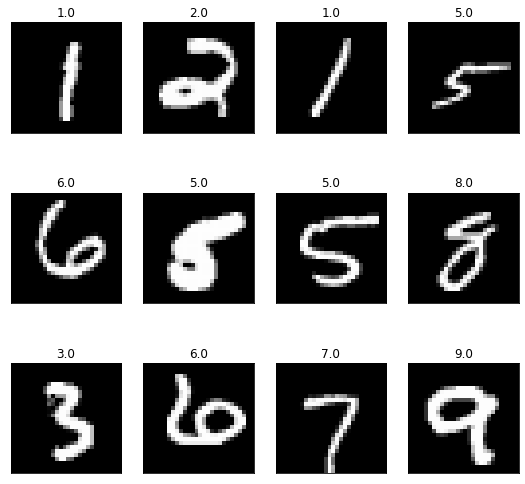

In [5]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

mnist = loadmat("/kaggle/input/mnist-original/mnist-original.mat")
mnist_data = mnist["data"].T

print(mnist["label"])

mnist_label = mnist["label"][0]

X_train, X_test, label_train, label_test = train_test_split(mnist_data, mnist_label, test_size=0.15, random_state=42)

y_train = np.zeros((label_train.shape[0], 10))
for i in range(y_train.shape[0]):
    y_train[i][int(label_train[i])] = 1
    
y_test = np.zeros((label_test.shape[0], 10))
for i in range(y_test.shape[0]):
    y_test[i][int(label_test[i])] = 1

train_images = np.reshape(X_train, (X_train.shape[0], 28, 28))
test_images = np.reshape(X_test, (X_test.shape[0], 28, 28))

titles = label_train
plot_gallery(train_images, titles, 28, 28, total=12)

# Model 1 : Keras & Tensorflow - sequential model

In [7]:
print(X_train.shape)
print(label_train.shape)

(59500, 784)
(59500,)


In [12]:
import tensorflow as tf
x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)
print(x_train.shape, label_train.shape, x_test.shape, label_test.shape)

(59500, 784) (59500,) (10500, 784) (10500,)


In [14]:
model = tf.keras.models.Sequential()
# Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784
model.add(tf.keras.layers.Flatten())
# use 128 neurons & use relu act func. We will be creating a dense-connected layer meaning that it is fully connected meaning that each node is entirely connected to the previous one and subequent one
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# the final output layer must be Dense and must fit # classifications and must use probability distribution instead of an activation function
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(
    optimizer= 'adam' ,# NN intends to minimize losss, not maximize accuracy
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, label_train, epochs = 3)

Epoch 1/3
1860/1860 [==============================] - 4s 2ms/step - loss: 1.6649 - accuracy: 0.8770
Epoch 2/3
1860/1860 [==============================] - 4s 2ms/step - loss: 0.3256 - accuracy: 0.9317
Epoch 3/3
1860/1860 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9482


In [16]:
val_loss, val_acc = model.evaluate(X_test, label_test)
print(val_loss, val_acc)

329/329 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9449
0.2396424561738968 0.944857120513916


# Model 2: Sckit learn library

In [18]:
from sklearn.neural_network import MLPClassifier

In [33]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, label_train)
clf.predict_proba(X_test[:1])
clf.score(X_test, label_test)

0.9632380952380952

In [40]:
predictions = clf.predict(X_test)
predictions
#print(X_test.shape)

array([7., 8., 6., ..., 3., 6., 2.])

# Model 3: Using pre-defined Perceptron 

In [25]:
class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []

    def calculate_output(self, inputs):
        self.inputs = inputs
        self.output = self.squash(self.calculate_total_net_input())
        return self.output

    def calculate_total_net_input(self):
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    def squash(self, total_net_input):
        return 1 / (1 + math.exp(-total_net_input))
    def calculate_pd_error_wrt_total_net_input(self, target_output):
        return self.calculate_pd_error_wrt_output(target_output) * self.calculate_pd_total_net_input_wrt_input();

    # The error for each neuron is calculated by the Mean Square Error method:
    def calculate_error(self, target_output):
        return 0.5 * (target_output - self.output) ** 2
    def calculate_pd_error_wrt_output(self, target_output):
        return -(target_output - self.output)
    def calculate_pd_total_net_input_wrt_input(self):
        return self.output * (1 - self.output)
    def calculate_pd_total_net_input_wrt_weight(self, index):
        return self.inputs[index]
    
class NeuronLayer:
    def __init__(self, num_neurons, bias):

        # Every neuron in a layer shares the same bias -- just in this example, usually this is not the case!
        self.bias = bias if bias else random.random()

        self.neurons = []
        for i in range(num_neurons):
            self.neurons.append(Neuron(self.bias))

    def inspect(self):
        print('Neurons:', len(self.neurons))
        for n in range(len(self.neurons)):
            print(' Neuron', n)
            for w in range(len(self.neurons[n].weights)):
                print('  Weight:', self.neurons[n].weights[w])
            print('  Bias:', self.neurons[n].bias)

    def feed_forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.calculate_output(inputs))
        return outputs

    def get_outputs(self):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.output)
        return outputs

class NeuralNetwork:
    LEARNING_RATE = 0.5

    def __init__(self, num_inputs, num_hidden, num_outputs, hidden_layer_weights = None, hidden_layer_bias = None, output_layer_weights = None, output_layer_bias = None):
        self.num_inputs = num_inputs

        self.hidden_layer = NeuronLayer(num_hidden, hidden_layer_bias)
        self.output_layer = NeuronLayer(num_outputs, output_layer_bias)

        self.init_weights_from_inputs_to_hidden_layer_neurons(hidden_layer_weights)
        self.init_weights_from_hidden_layer_neurons_to_output_layer_neurons(output_layer_weights)

    def init_weights_from_inputs_to_hidden_layer_neurons(self, hidden_layer_weights):
        weight_num = 0
        for h in range(len(self.hidden_layer.neurons)):
            for i in range(self.num_inputs):
                if not hidden_layer_weights:
                    self.hidden_layer.neurons[h].weights.append(random.random())
                else:
                    self.hidden_layer.neurons[h].weights.append(hidden_layer_weights[weight_num])
                weight_num += 1

    def init_weights_from_hidden_layer_neurons_to_output_layer_neurons(self, output_layer_weights):
        weight_num = 0
        for o in range(len(self.output_layer.neurons)):
            for h in range(len(self.hidden_layer.neurons)):
                if not output_layer_weights:
                    self.output_layer.neurons[o].weights.append(random.random())
                else:
                    self.output_layer.neurons[o].weights.append(output_layer_weights[weight_num])
                weight_num += 1

    def inspect(self):
        print('------')
        print('* Inputs: {}'.format(self.num_inputs))
        print('------')
        print('Hidden Layer')
        self.hidden_layer.inspect()
        print('------')
        print('* Output Layer')
        self.output_layer.inspect()
        print('------')

    def feed_forward(self, inputs):
        hidden_layer_outputs = self.hidden_layer.feed_forward(inputs)
        return self.output_layer.feed_forward(hidden_layer_outputs)

    # Uses online learning, ie updating the weights after each training case
    def train(self, training_inputs, training_outputs):
        self.feed_forward(training_inputs)

        # 1. Output neuron deltas
        pd_errors_wrt_output_neuron_total_net_input = [0] * len(self.output_layer.neurons)
        for o in range(len(self.output_layer.neurons)):

            # ∂E/∂zⱼ
            pd_errors_wrt_output_neuron_total_net_input[o] = self.output_layer.neurons[o].calculate_pd_error_wrt_total_net_input(training_outputs[o])

        # 2. Hidden neuron deltas
        pd_errors_wrt_hidden_neuron_total_net_input = [0] * len(self.hidden_layer.neurons)
        for h in range(len(self.hidden_layer.neurons)):

            # We need to calculate the derivative of the error with respect to the output of each hidden layer neuron
            # dE/dyⱼ = Σ ∂E/∂zⱼ * ∂z/∂yⱼ = Σ ∂E/∂zⱼ * wᵢⱼ
            d_error_wrt_hidden_neuron_output = 0
            for o in range(len(self.output_layer.neurons)):
                d_error_wrt_hidden_neuron_output += pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].weights[h]

            # ∂E/∂zⱼ = dE/dyⱼ * ∂zⱼ/∂
            pd_errors_wrt_hidden_neuron_total_net_input[h] = d_error_wrt_hidden_neuron_output * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_input()

        # 3. Update output neuron weights
        for o in range(len(self.output_layer.neurons)):
            for w_ho in range(len(self.output_layer.neurons[o].weights)):

                # ∂Eⱼ/∂wᵢⱼ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢⱼ
                pd_error_wrt_weight = pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].calculate_pd_total_net_input_wrt_weight(w_ho)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.output_layer.neurons[o].weights[w_ho] -= self.LEARNING_RATE * pd_error_wrt_weight

        # 4. Update hidden neuron weights
        for h in range(len(self.hidden_layer.neurons)):
            for w_ih in range(len(self.hidden_layer.neurons[h].weights)):

                # ∂Eⱼ/∂wᵢ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢ
                pd_error_wrt_weight = pd_errors_wrt_hidden_neuron_total_net_input[h] * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_weight(w_ih)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.hidden_layer.neurons[h].weights[w_ih] -= self.LEARNING_RATE * pd_error_wrt_weight

    def calculate_total_error(self, training_sets):
        total_error = 0
        for t in range(len(training_sets)):
            training_inputs, training_outputs = training_sets[t]
            self.feed_forward(training_inputs)
            for o in range(len(training_outputs)):
                total_error += self.output_layer.neurons[o].calculate_error(training_outputs[o])
        return total_error



In [26]:
nn = NeuralNetwork(2, 2, 2, hidden_layer_weights=[0.15, 0.2, 0.25, 0.3], hidden_layer_bias=0.35, output_layer_weights=[0.4, 0.45, 0.5, 0.55], output_layer_bias=0.6)